In [1]:
#load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

dataset=pd.read_csv(r'C:\Users\BSIB\Documents\MachineLearning\Assignment\Data\breastCancerImage.csv')

In [3]:
# To investigate the number of observations and features

dataset.shape

(569, 33)

In [4]:
# To observe first few rows of the dataset

dataset.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [5]:
# Let's look at the features in the selected dataset

list(dataset.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [6]:
# Drop the 'id' and 'Unnamed: 32' columns as they do not affect the target

dataset=dataset.drop(['id', 'Unnamed: 32'], axis = 1)

In [7]:
# To group data by our target which is 'diagnosis' to check if there is any imbalance in the dataset

dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

radius_mean                    AxesSubplot(0.125,0.71587;0.0824468x0.16413)
texture_mean                AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
perimeter_mean              AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
area_mean                   AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
smoothness_mean             AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
compactness_mean            AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
concavity_mean              AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
concave points_mean         AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
symmetry_mean                 AxesSubplot(0.125,0.518913;0.0824468x0.16413)
fractal_dimension_mean     AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
radius_se                  AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
texture_se                 AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
perimeter_se               AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
area_se     

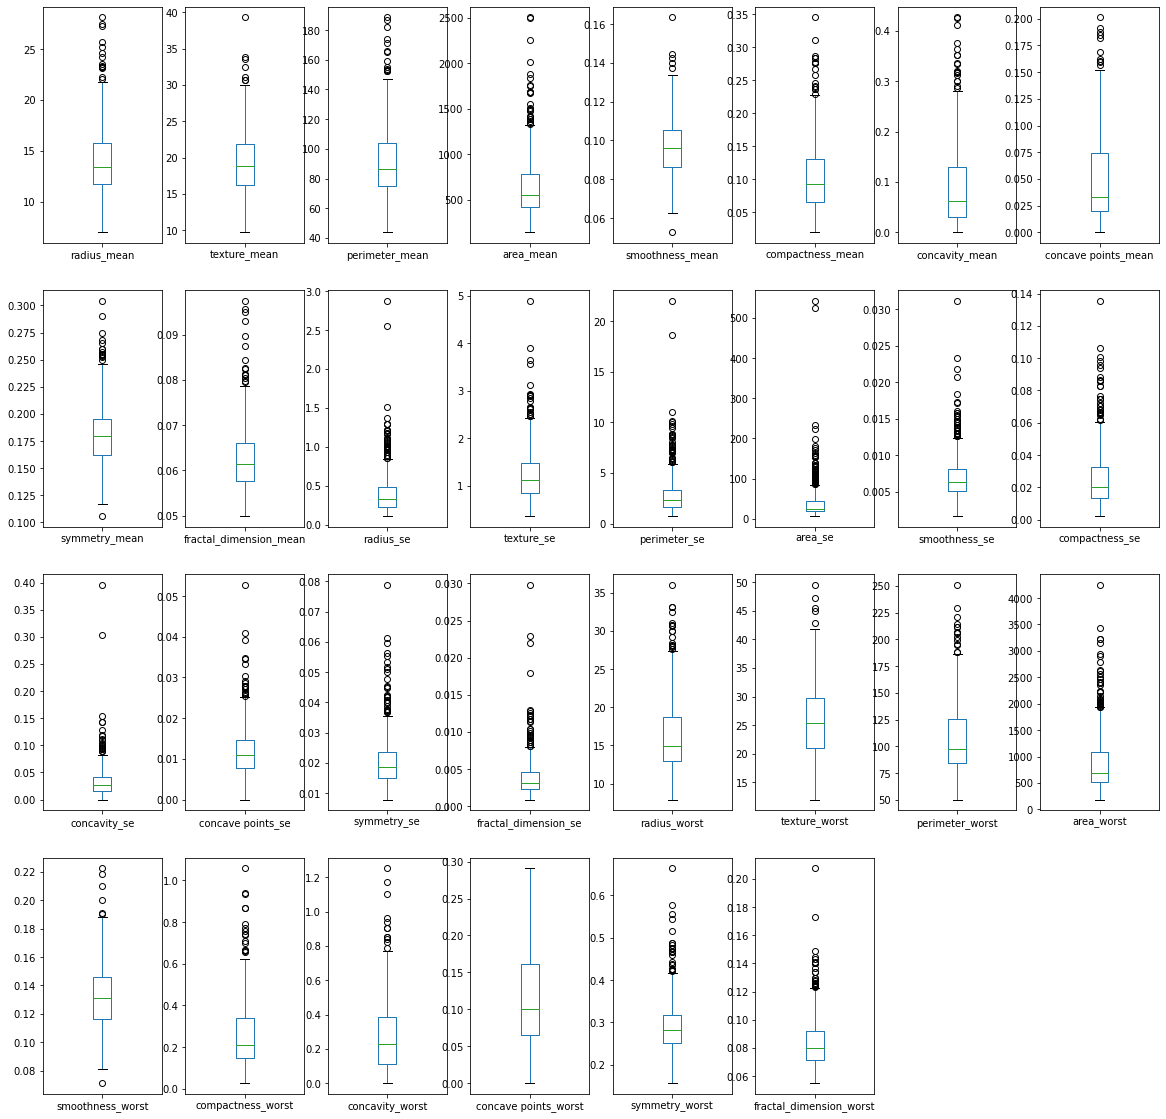

In [10]:
# Box and whisker plots to show data range of all features

dataset.plot(kind='box', subplots=True, layout=(4,8), sharex=False,sharey=False, figsize=(20,20))

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

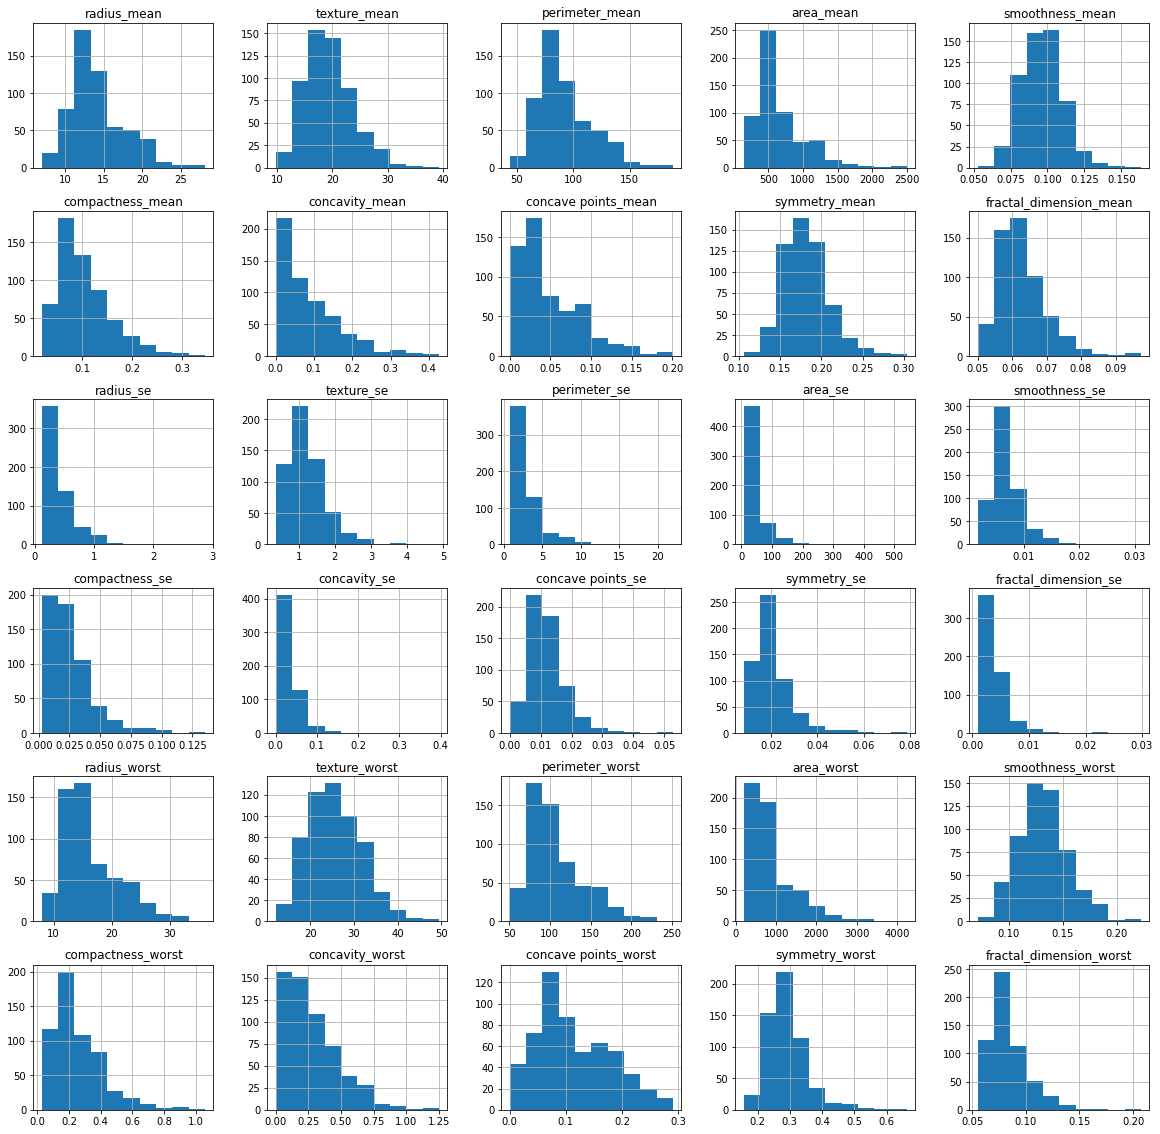

In [11]:
# Histograms to show the distribution of data of individual features

dataset.hist(figsize=(20,20))

<AxesSubplot:>

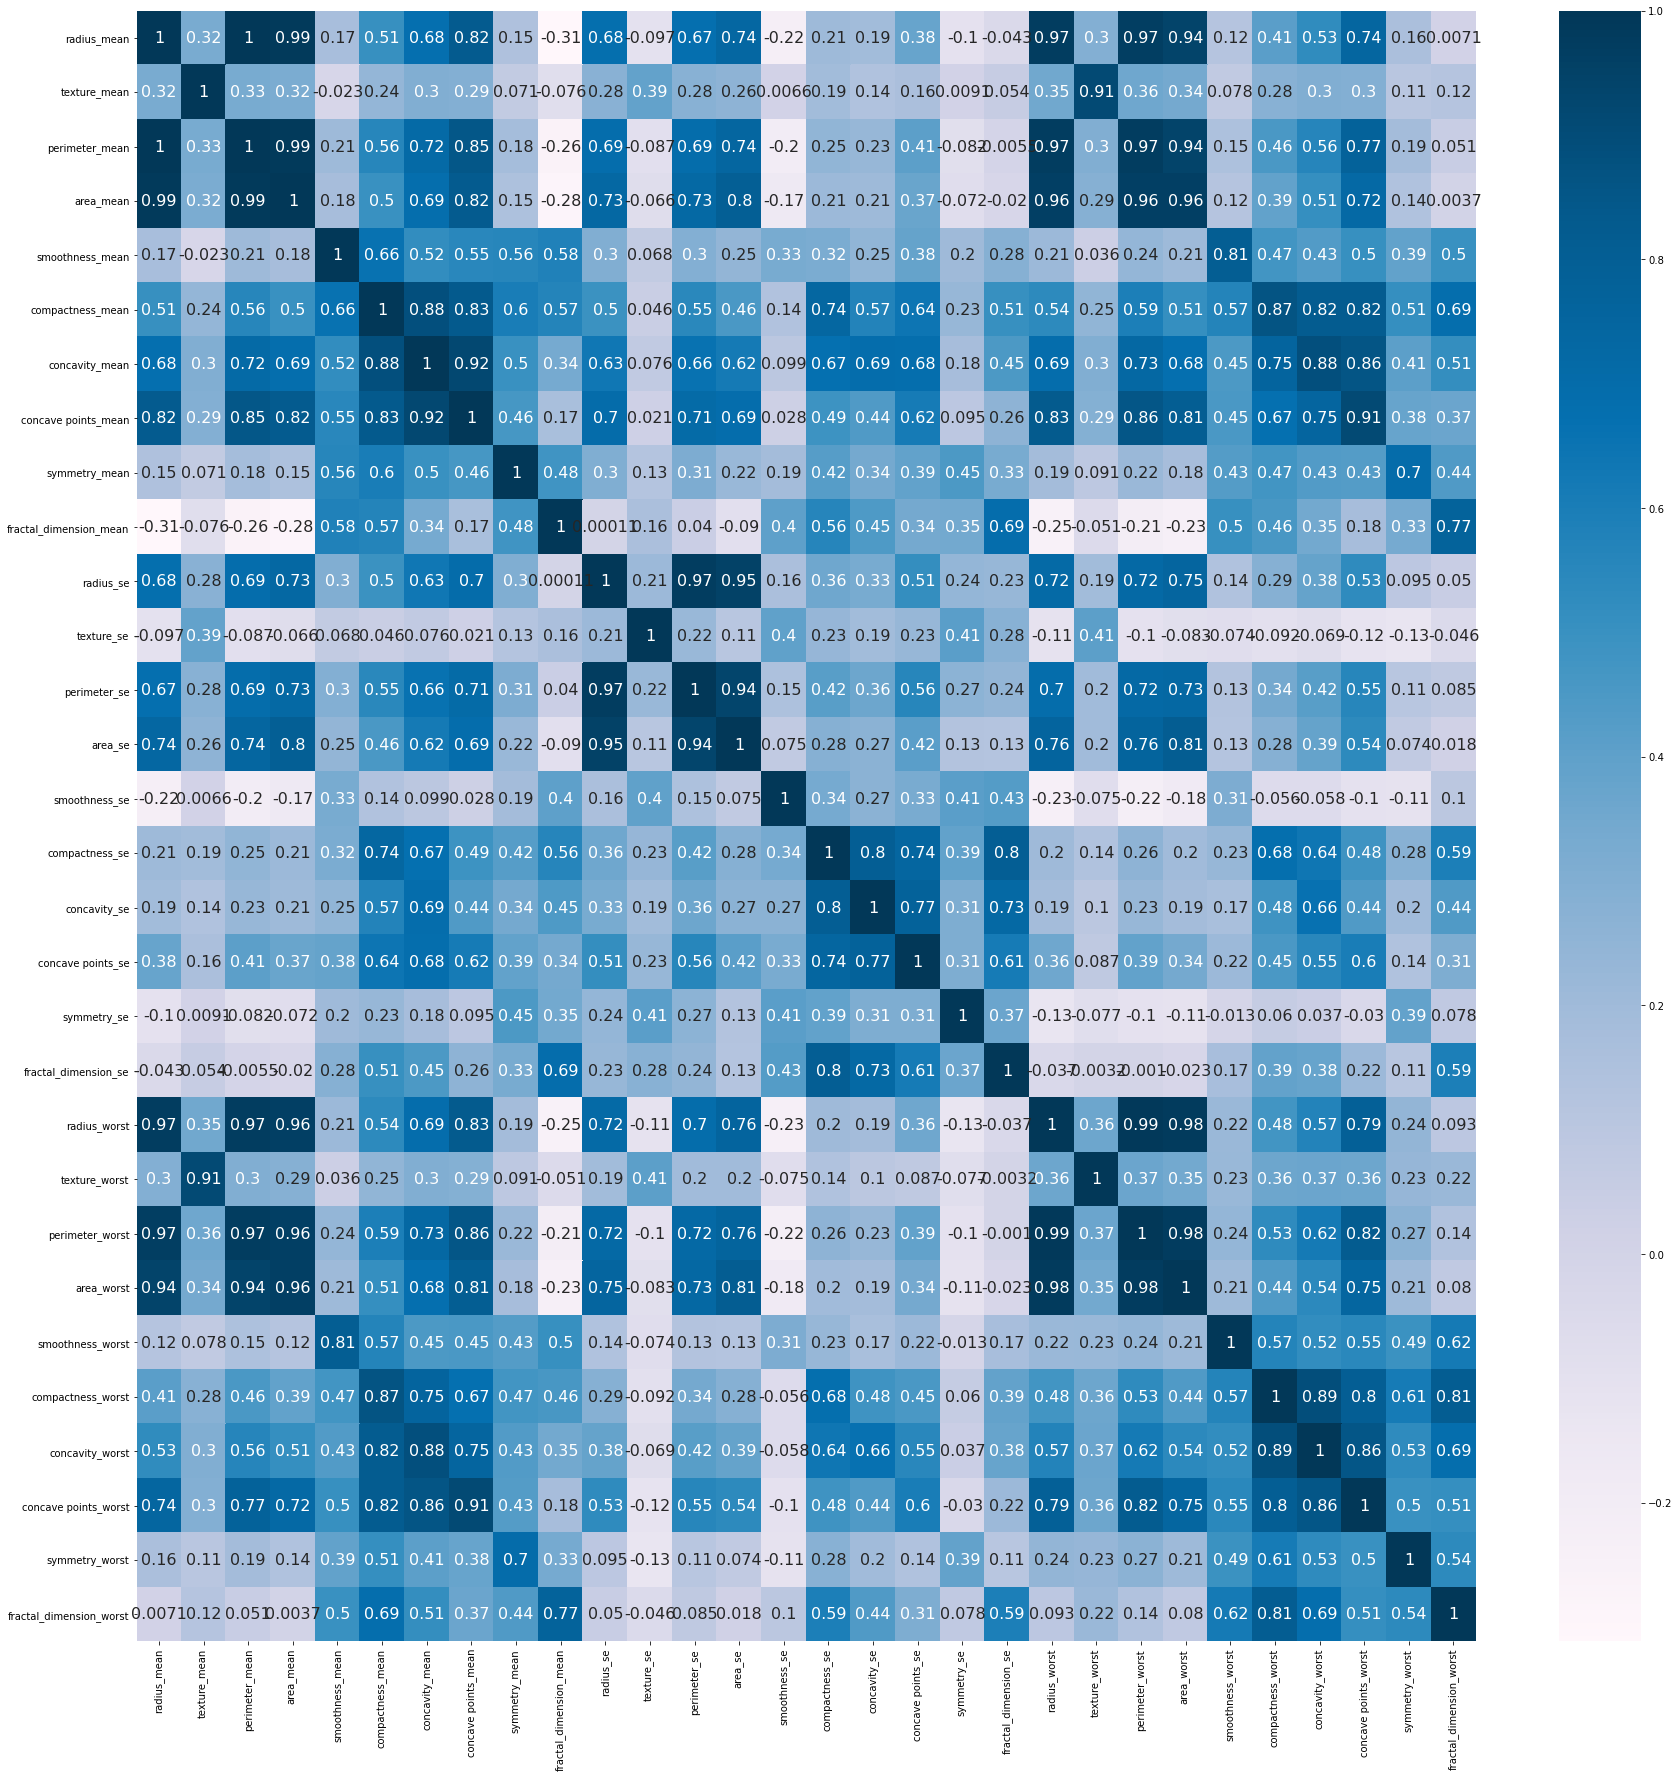

In [12]:
# To investigate the correlation matrix of the features

import seaborn as sb
plt.figure(figsize=(30,30),facecolor='w')
sb.heatmap(dataset.corr(), annot=True, cmap='PuBu',annot_kws={'size':16})

In [14]:
# Split-out dataset to train and validation

array = dataset.values
X = array[:,1:31]
Y = array[:,0]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [16]:
# Show the number of observations on train and validation set

print(len(X_train))
print(len(X_validation))

455
114


(455, 30)
(455, 30)
[0.44100056 0.63033702 0.72667319 0.79265148 0.84872183 0.88906412
 0.91137284 0.92613709 0.94027022 0.9513613  0.96142475 0.97033395
 0.97860581 0.98375323 0.9867538  0.98950172 0.99145222 0.99304829
 0.99456532 0.99566187 0.99661544 0.99749981 0.99828369 0.99890345
 0.99944658 0.99970771 0.99991949 0.99997244 0.99999539 1.        ]


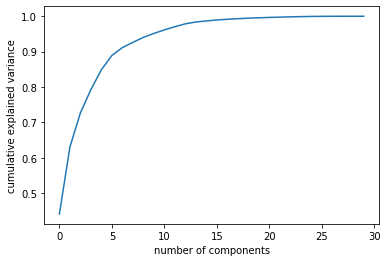

In [17]:
# To address multicollinearity we will perform PCA on normalised data

from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

from sklearn.decomposition import PCA

# To plot cumulative variance against number of components 
pca = PCA()
X1= pca.fit_transform(X_train)
X2 = pca.transform(X_validation)
print(X_train.shape)
print(X1.shape)
pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(np.cumsum(pca.explained_variance_ratio_))

In [18]:
# No of components selected to explain at least 90%

pca = PCA(n_components=7)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)
pca.explained_variance_ratio_

array([0.44100056, 0.18933646, 0.09633617, 0.06597829, 0.05607035,
       0.04034228, 0.02230873])

In [19]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [20]:
#Classification Algo used for training

models=[]
models.append(('LR', LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models

[('LR', LogisticRegression(max_iter=200)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

In [21]:
# Evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    #print(cv_results)
    results.append(cv_results)
    #print(results)
    names.append(names)
    msg='%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.966957 (0.020230)
LDA: 0.953720 (0.025025)
KNN: 0.958019 (0.030571)
CART: 0.947150 (0.035757)
NB: 0.925024 (0.038830)
SVM: 0.940386 (0.048819)


LR
Accuracy:
0.9649122807017544

Confusion matrix:
[[74  0]
 [ 4 36]]

Classification report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        74
           M       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



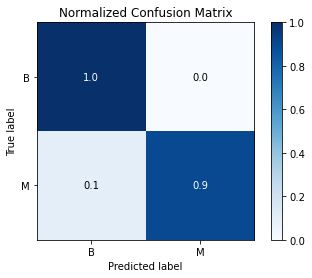

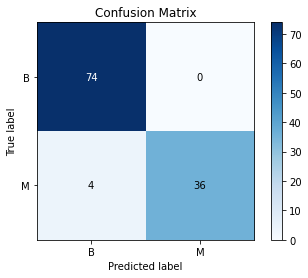

LDA
Accuracy:
0.9385964912280702

Confusion matrix:
[[74  0]
 [ 7 33]]

Classification report:
              precision    recall  f1-score   support

           B       0.91      1.00      0.95        74
           M       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



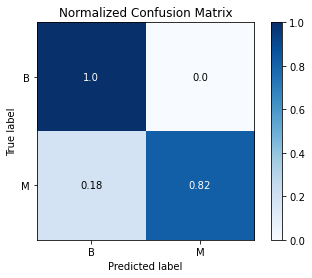

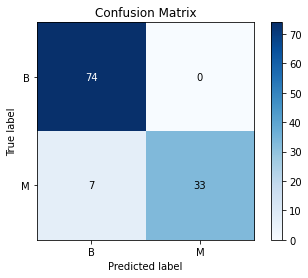

KNN
Accuracy:
0.956140350877193

Confusion matrix:
[[74  0]
 [ 5 35]]

Classification report:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        74
           M       1.00      0.88      0.93        40

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



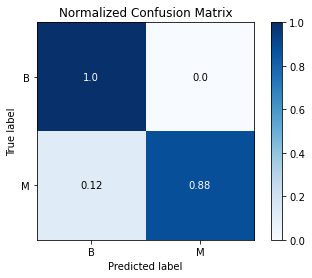

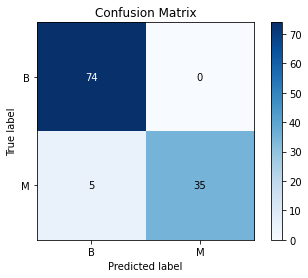

CART
Accuracy:
0.9473684210526315

Confusion matrix:
[[69  5]
 [ 1 39]]

Classification report:
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        74
           M       0.89      0.97      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



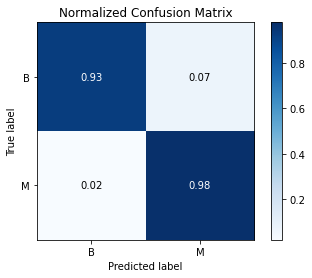

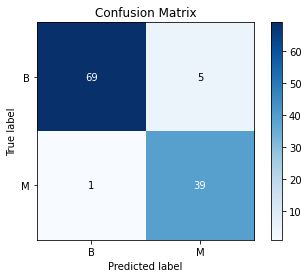

NB
Accuracy:
0.9473684210526315

Confusion matrix:
[[72  2]
 [ 4 36]]

Classification report:
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        74
           M       0.95      0.90      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



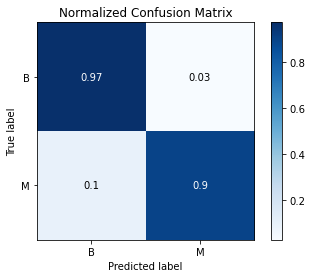

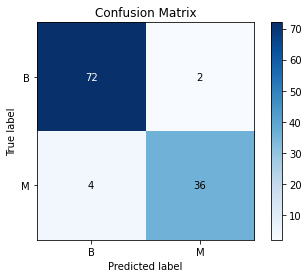

SVM
Accuracy:
0.9912280701754386

Confusion matrix:
[[74  0]
 [ 1 39]]

Classification report:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        74
           M       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



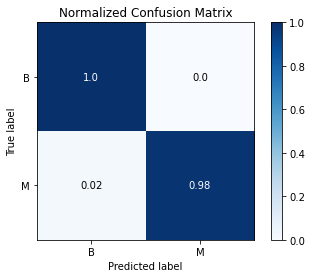

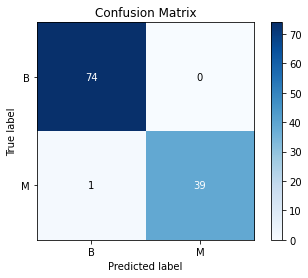

In [22]:
# Train and test data using various models

import scikitplot as skplt
for name, model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_validation)
    print(name)
    print('Accuracy:')
    print(accuracy_score(Y_validation, predictions))
    print()
    print('Confusion matrix:')
    print(confusion_matrix(Y_validation,predictions))
    print()
    print('Classification report:')
    print(classification_report(Y_validation,predictions))
    skplt.metrics.plot_confusion_matrix(Y_validation, predictions, normalize=True)
    skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
    #skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
    plt.show()
    

In [24]:
# Hyperparameter tuning using GridSearch on chosen models

from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
clf = GridSearchCV(SVC(), parameters, cv=10, n_jobs=4,verbose=True)
clf.fit(X_train, Y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_),clf.best_estimator_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best: 0.969324 using {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'} SVC(C=1, gamma=0.01, kernel='sigmoid')


Accuracy:
0.9210526315789473

Confusion matrix:
[[74  0]
 [ 9 31]]

Classification report:
              precision    recall  f1-score   support

           B       0.89      1.00      0.94        74
           M       1.00      0.78      0.87        40

    accuracy                           0.92       114
   macro avg       0.95      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



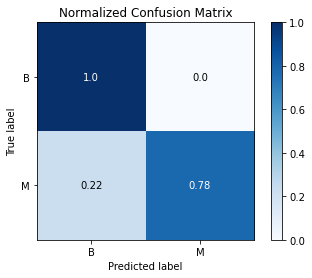

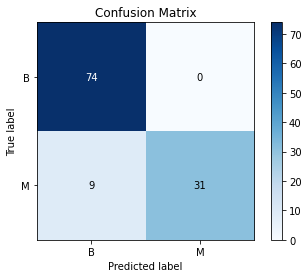

In [25]:
# Evaluate the model with parameters chosen by GridSearch

model=SVC(C=1, gamma=0.001, kernel='sigmoid')
model.fit(X_train, Y_train)

predictions=model.predict(X_validation)
print('Accuracy:')
print(accuracy_score(Y_validation, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(Y_validation,predictions))
print()
print('Classification report:')
print(classification_report(Y_validation,predictions))
skplt.metrics.plot_confusion_matrix(Y_validation, predictions, normalize=True)
skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
#skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
plt.show()

In [26]:
#parameters tuning
from sklearn.model_selection import GridSearchCV

# Use ensemble learning to improve base model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

models = []
models.append(('ADA' , AdaBoostClassifier()))
models.append(('GBC' , GradientBoostingClassifier()))
models.append(('BAG' , BaggingClassifier()))
models.append(('RFC' , RandomForestClassifier()))
models.append(('ETC'  , ExtraTreesClassifier()))


results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

ADA: 0.938116 (0.045342)
GBC: 0.953671 (0.037660)
BAG: 0.944783 (0.041292)
RFC: 0.944783 (0.038772)
ETC: 0.955845 (0.029818)


ADA
Accuracy:
0.9736842105263158

Confusion matrix:
[[73  1]
 [ 2 38]]

Classification report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        74
           M       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



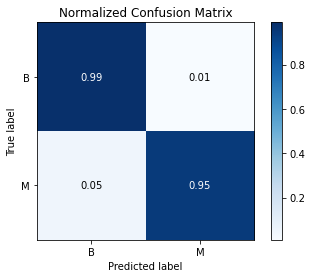

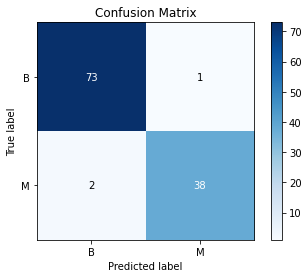

GBC
Accuracy:
0.956140350877193

Confusion matrix:
[[72  2]
 [ 3 37]]

Classification report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        74
           M       0.95      0.93      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



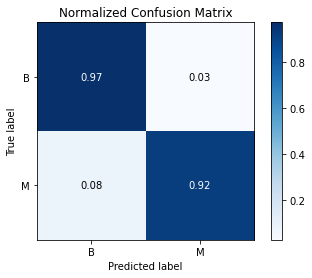

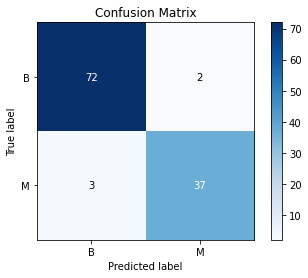

BAG
Accuracy:
0.9298245614035088

Confusion matrix:
[[70  4]
 [ 4 36]]

Classification report:
              precision    recall  f1-score   support

           B       0.95      0.95      0.95        74
           M       0.90      0.90      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



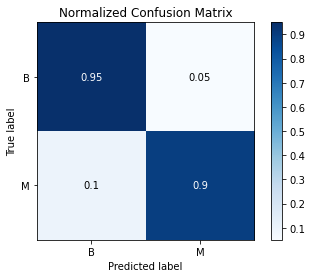

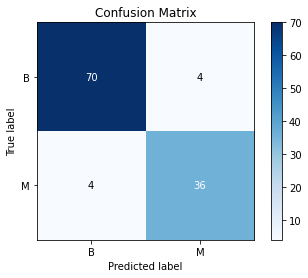

RFC
Accuracy:
0.9473684210526315

Confusion matrix:
[[71  3]
 [ 3 37]]

Classification report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        74
           M       0.93      0.93      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



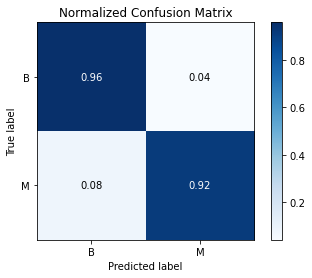

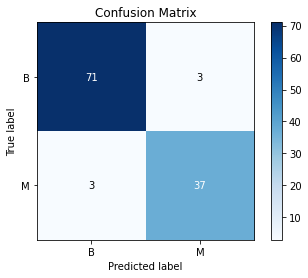

ETC
Accuracy:
0.9736842105263158

Confusion matrix:
[[74  0]
 [ 3 37]]

Classification report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        74
           M       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



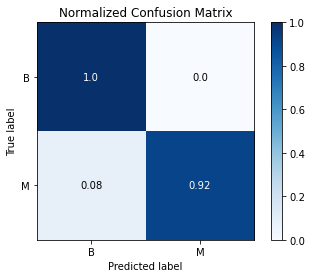

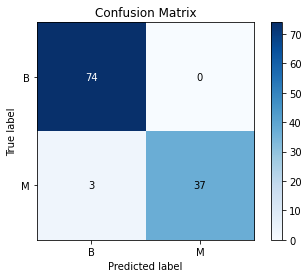

In [27]:
# Train and test data using various ensemble learning models

import scikitplot as skplt
for name, model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_validation)
    print(name)
    print('Accuracy:')
    print(accuracy_score(Y_validation, predictions))
    print()
    print('Confusion matrix:')
    print(confusion_matrix(Y_validation,predictions))
    print()
    print('Classification report:')
    print(classification_report(Y_validation,predictions))
    skplt.metrics.plot_confusion_matrix(Y_validation, predictions, normalize=True)
    skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
    #skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
    plt.show()
    

In [28]:
# Hyperparameter tuning using GridSearch on chosen models

parameters = {
    'n_estimators': [5, 10, 15, 100, 1000],
    'max_depth': [3, 5, 15, 25],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
    
}

clf = GridSearchCV(ExtraTreesClassifier(), parameters, cv=10, n_jobs=4,verbose=2)
clf.fit(X_train, Y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_),clf.best_estimator_)


Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best: 0.964928 using {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 10} ExtraTreesClassifier(max_depth=15, max_features='sqrt', n_estimators=10)


Accuracy:
0.9649122807017544

Confusion matrix:
[[73  1]
 [ 3 37]]

Classification report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        74
           M       0.97      0.93      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



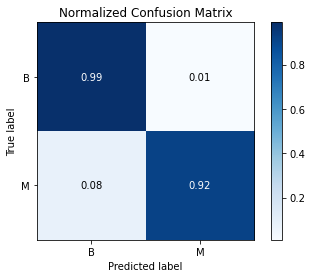

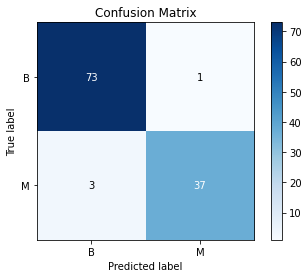

In [29]:
# Evaluate the model with parameters chosen by GridSearch

model=ExtraTreesClassifier(max_depth=15, max_features='sqrt', n_estimators=10)
model.fit(X_train, Y_train)
predictions=clf.predict(X_validation)
print('Accuracy:')
print(accuracy_score(Y_validation, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(Y_validation,predictions))
print()
print('Classification report:')
print(classification_report(Y_validation,predictions))
skplt.metrics.plot_confusion_matrix(Y_validation, predictions, normalize=True)
skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
#skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
plt.show()

In [30]:
# Hyperparameter tuning using GridSearch on chosen models

parameters = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
    
}

clf = GridSearchCV(AdaBoostClassifier(), parameters, cv=10, n_jobs=4,verbose=2)
clf.fit(X_train, Y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_),clf.best_estimator_)


Fitting 10 folds for each of 116 candidates, totalling 1160 fits
Best: 0.945072 using {'learning_rate': 0.1, 'n_estimators': 150} AdaBoostClassifier(learning_rate=0.1, n_estimators=150)


Accuracy:
0.9736842105263158

Confusion matrix:
[[73  1]
 [ 2 38]]

Classification report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        74
           M       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



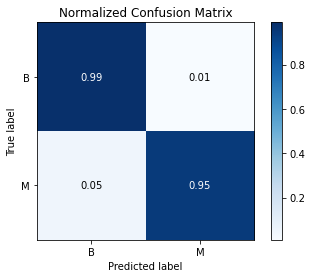

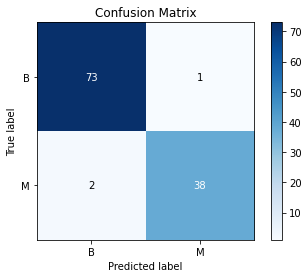

In [31]:
# Evaluate the model with parameters chosen by GridSearch

model=AdaBoostClassifier(learning_rate=0.1, n_estimators=150)
model.fit(X_train, Y_train)
predictions=clf.predict(X_validation)
print('Accuracy:')
print(accuracy_score(Y_validation, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(Y_validation,predictions))
print()
print('Classification report:')
print(classification_report(Y_validation,predictions))
skplt.metrics.plot_confusion_matrix(Y_validation, predictions, normalize=True)
skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
#skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
plt.show()